In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
crypto_currency = input('Enter the ticker symbol ')
currency = input('Currency ')
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
df = web.DataReader(f'{crypto_currency}-{currency}','yahoo',start,end)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df['Close'].values.reshape(-1,1))
days = 90

Enter the ticker symbol BTC
Currency USD


In [4]:
scaled_df

array([[0.00224381],
       [0.00214994],
       [0.00216231],
       ...,
       [0.49740883],
       [0.51049943],
       [0.5126231 ]])

In [6]:
x_train,y_train = [],[]
for i in range(days,len(scaled_df) - predict_for):
    x_train.append(scaled_df[i-days:i,0])
    y_train.append(scaled_df[i + predict_for,0])

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [13]:
model = Sequential()
model.add(LSTM(units = 80, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 80,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 80))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 30, batch_size = 45)

Epoch 1/30
51/51 [==============================] - 12s 144ms/step - loss: 0.0088
Epoch 2/30
51/51 [==============================] - 7s 133ms/step - loss: 0.0017
Epoch 3/30
51/51 [==============================] - 7s 132ms/step - loss: 0.0015
Epoch 4/30
51/51 [==============================] - 7s 131ms/step - loss: 0.0014
Epoch 5/30
51/51 [==============================] - 7s 131ms/step - loss: 0.0011
Epoch 6/30
51/51 [==============================] - 8s 148ms/step - loss: 0.0017
Epoch 7/30
51/51 [==============================] - 7s 146ms/step - loss: 9.7512e-04
Epoch 8/30
51/51 [==============================] - 8s 157ms/step - loss: 0.0014
Epoch 9/30
51/51 [==============================] - 7s 146ms/step - loss: 0.0011
Epoch 10/30
51/51 [==============================] - 8s 148ms/step - loss: 9.0723e-04
Epoch 11/30
51/51 [==============================] - 8s 150ms/step - loss: 0.0010
Epoch 12/30
51/51 [==============================] - 7s 147ms/step - loss: 8.1072e-04
Epoch 13/30


In [14]:
start_test = dt.datetime(2020,1,1)
end_test = dt.datetime.now()
test_df = web.DataReader(f'{crypto_currency}-{currency}','yahoo',start_test,end_test)
correct_prices = test_df['Close'].values
data = pd.concat((df['Close'], test_df['Close']), axis = 0)
input = data[len(data) - len(test_df) - days:].values
input = input.reshape(-1,1)
input = scaler.fit_transform(input)

In [15]:
x_test = []
for i in range(days,len(input)):
    x_test.append(input[i - days:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

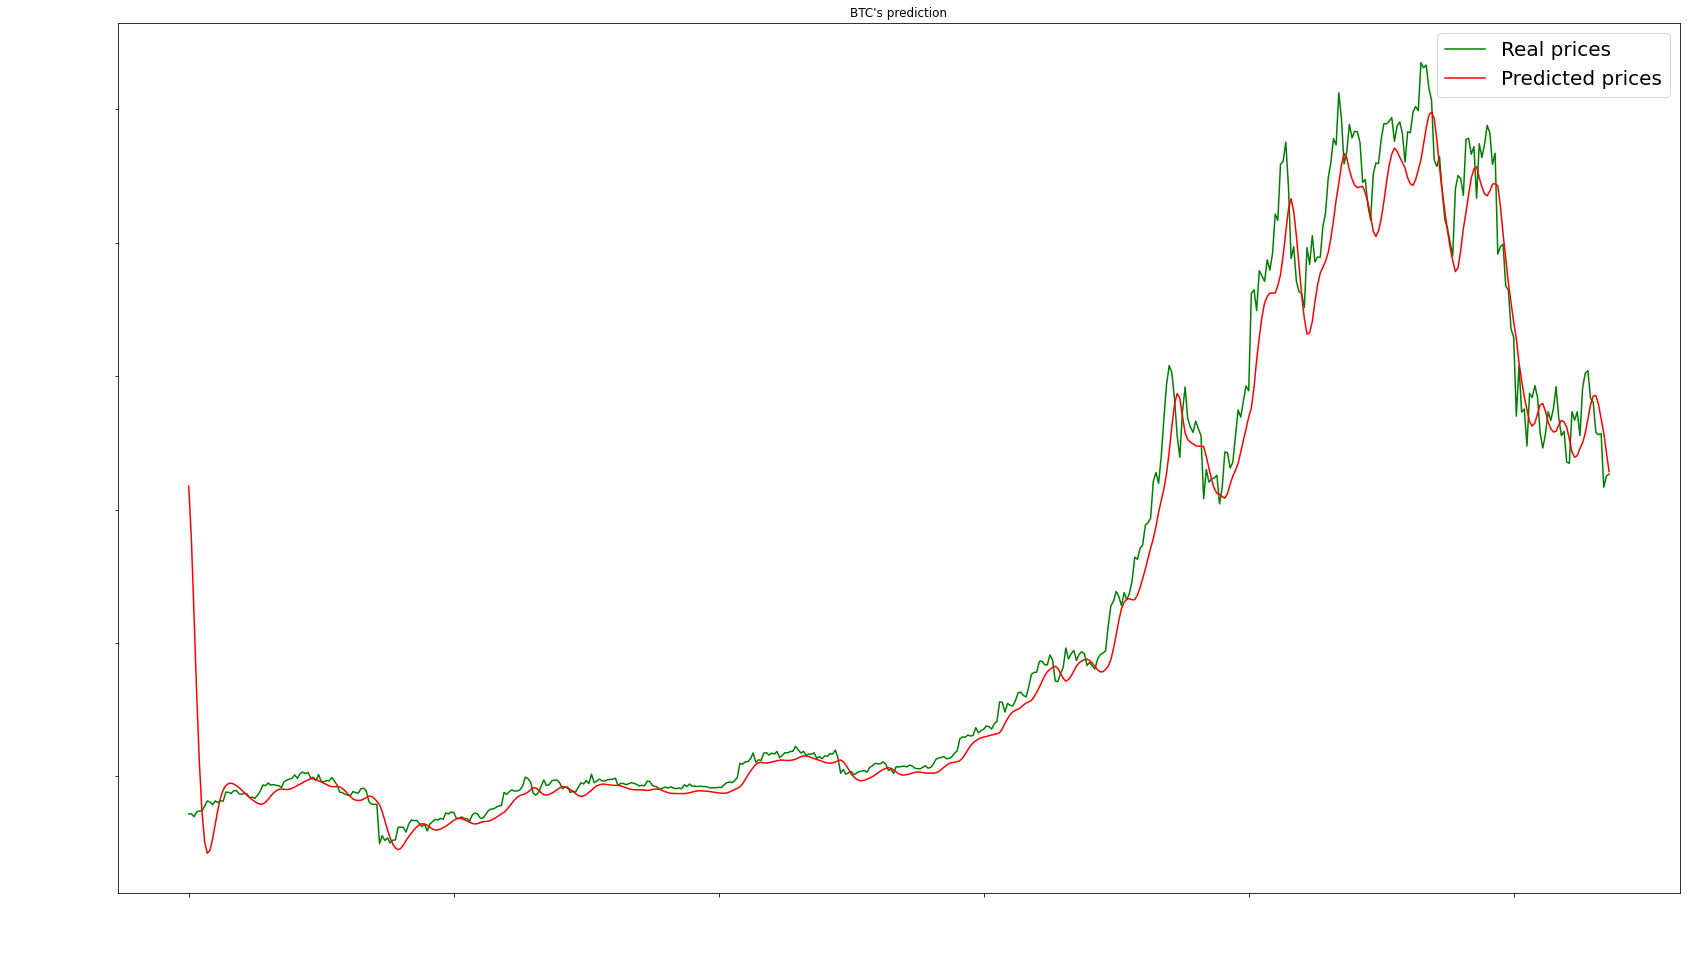

In [46]:
plt.figure(figsize = (28,16),edgecolor = ('black'))
plt.plot(correct_prices, color = 'green', label = 'Real prices')
plt.plot(predicted_price, color = 'red', label = 'Predicted prices')
plt.title(f"{crypto_currency}'s prediction")
plt.xlabel('Time',size = 30,color = 'white')
plt.xticks(size = 22,color = 'white')
plt.ylabel('Price',size = 30,color = 'white')
plt.yticks(size = 22,color = 'white')
plt.legend(loc = 'upper right',prop = {'size':20})
plt.show()

In [22]:
dataset = [input[len(input) + 1 - days:len(input) + 1, 0]]
dataset = np.array(dataset)
dataset = np.reshape(dataset, (dataset.shape[0],dataset.shape[1], 1))
prediction = model.predict(dataset)
prediction = scaler.inverse_transform(predicted_price)
print(prediction)

[[1.85917376e+09]
 [1.62725696e+09]
 [1.29559040e+09]
 [9.49241024e+08]
 [6.50599040e+08]
 [4.31611488e+08]
 [2.99936608e+08]
 [2.48392640e+08]
 [2.60072912e+08]
 [3.10646336e+08]
 [3.75717376e+08]
 [4.39611168e+08]
 [4.91135168e+08]
 [5.26533152e+08]
 [5.45320448e+08]
 [5.54213568e+08]
 [5.56069760e+08]
 [5.52015744e+08]
 [5.44902144e+08]
 [5.36357888e+08]
 [5.25843104e+08]
 [5.13992800e+08]
 [5.02755328e+08]
 [4.92910816e+08]
 [4.83300832e+08]
 [4.74693216e+08]
 [4.67387680e+08]
 [4.63330304e+08]
 [4.64546144e+08]
 [4.72777536e+08]
 [4.85237952e+08]
 [4.99806912e+08]
 [5.12735104e+08]
 [5.22472192e+08]
 [5.28306336e+08]
 [5.30347712e+08]
 [5.28874944e+08]
 [5.28003616e+08]
 [5.29473792e+08]
 [5.33224608e+08]
 [5.38512256e+08]
 [5.45688960e+08]
 [5.51770112e+08]
 [5.57918336e+08]
 [5.64540736e+08]
 [5.70128000e+08]
 [5.74608448e+08]
 [5.75049088e+08]
 [5.72180736e+08]
 [5.65981696e+08]
 [5.61110016e+08]
 [5.55621184e+08]
 [5.49600256e+08]
 [5.44424000e+08]
 [5.40644672e+08]
 [5.401089